In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from scipy.optimize import curve_fit
import csv

In [3]:
#Read data from csv file
data = pd.read_csv('results_force.csv')
time = data['Time']
X = data['X']
Y = data['Y']
r = data['r']
data.head()


,Time,X,Y,r
0,0,-750.000000,0.000000,750.000000
1,1,-749.126460,0.000000,749.126460
2,2,-748.725746,4.656892,748.740229
3,3,-748.387585,5.951188,748.411247
4,4,-738.557344,7.088925,738.591364


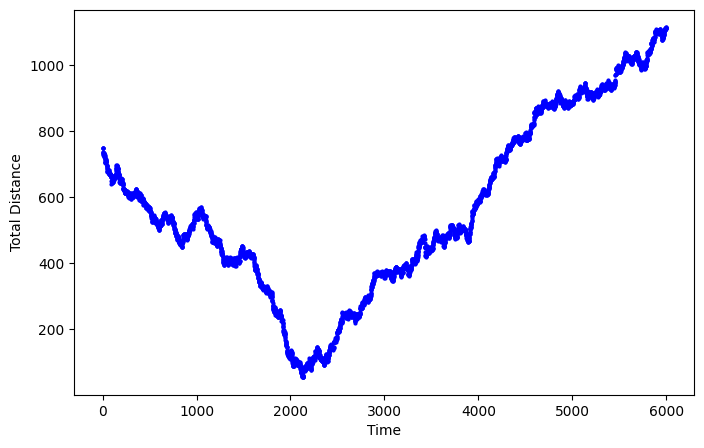

In [4]:
#Plot the time vs. total distance from origin
fig1 = plt.figure(figsize=(8,5))
plt.plot(time,r, 'ob', markersize = 2)
plt.xlabel('Time')
plt.ylabel('Total Distance')  
plt.grid(False)  

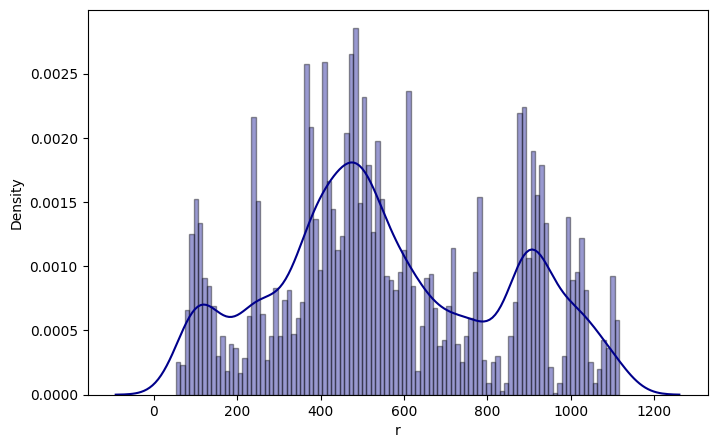

In [5]:
fig2 = plt.figure(figsize=(8,5))
warnings.filterwarnings('ignore')
sns.distplot(r, hist = True, kde = True, bins = 100, color = 'darkblue', hist_kws={'edgecolor': 'black'})
plt.grid(False)  

In [6]:
#calculate the mean square displacement MSD
#Reference: https://www.youtube.com/watch?v=yZ7zHg7goBc

#Define the variable rdiff
rdiff = np.zeros(len(time))

#create tau variable as an array of integers numbers from 1 to 200
tau = list(range(0,200))
#Define mean square displacement 
MSD = np.zeros(len(tau))
for j in range(1,len(tau)): #loop through tau
        sum = 0
        for i in range(j, len(rdiff)): #loop through rdiff
                rdiff[i] = (r[i]-r[i-j])**2 + sum
                sum = rdiff[i]
        MSD[j] = sum/len(rdiff) #calculate mean square displacement


In [7]:
#Save the results of MSD with tau as a csv file

with open('rdiff_force.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['tau', 'MSD'])
    for i in range(0,len(tau)):
        writer.writerow([tau[i], MSD[i]])

In [8]:
#Create a Dataframe with MSD and tau values
df = pd.DataFrame()
df['tau'] = tau
df['MSD'] = MSD
df.head()


,tau,MSD
0,0,0.000000
1,1,11.942808
2,2,23.658532
3,3,35.464462
4,4,47.223380


In [9]:
#Transform tau to array
def tau_to_array(tau):
    tau_array = np.zeros(len(tau))
    for i in range(len(tau)):
        tau_array[i] = tau[i]
    return tau_array

tau = tau_to_array(tau)

In [10]:
# Define the model function MSD = D*tau^alpha
# Reference:  doi:10.1039/C4CP03465A
def model_func(tau, D, alpha):
    return D * tau**alpha

In [11]:
# Fit the data to the model
popt = curve_fit(model_func, tau, MSD)
Diffusivity = popt[0][0]
alpha = popt[0][1]
# Print the values of C and alpha
print('Diffusivity = {:.2f} px^2/step^{:.2f}'.format(Diffusivity, alpha))
print('alpha = {:.2f}'.format(alpha))
if alpha < 1:
    print('The process is subdiffusive')
else:
    print('The process is superdiffusive')

Diffusivity = 3.70 px^2/step^1.37
alpha = 1.37
The process is superdiffusive


In [12]:
predictions = model_func(tau, popt[0][0], popt[0][1])

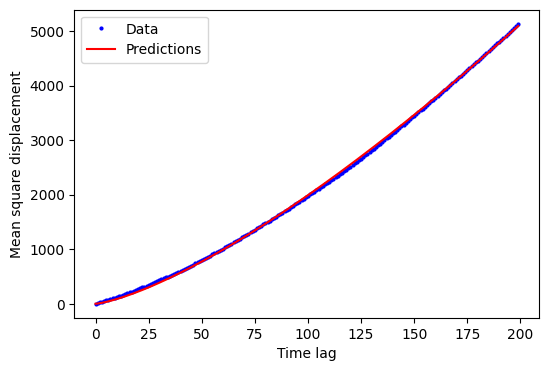

In [13]:
#Plot results
fig3 = plt.figure(figsize=(6,4))
plt.plot(tau, MSD, 'ob', markersize = 2, label = 'Data')
plt.plot(tau, predictions, color = 'red', label = 'Predictions')
plt.legend(loc = 'best')
plt.xlabel('Time lag')
plt.ylabel('Mean square displacement')
plt.grid(False)